In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import svm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [82]:
df = pd.read_csv("data.csv")

In [83]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [85]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [86]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

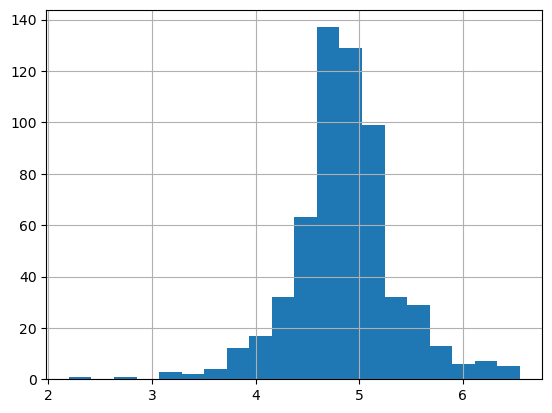

In [87]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [88]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

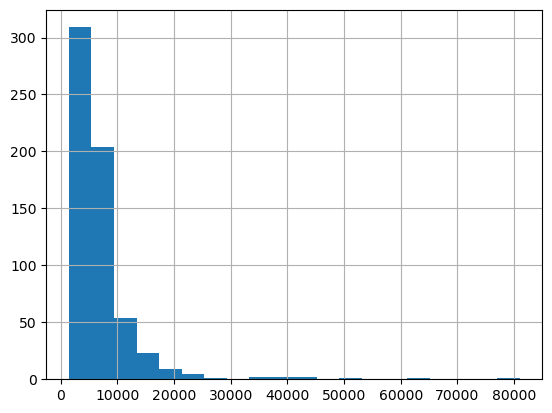

In [89]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome'].hist(bins=20)

In [90]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
dtype: int64

In [91]:

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
dtype: int64

In [92]:
X = df.iloc[:,np.r_[1:5,9:11,13]].values
Y=df.iloc[:,12].values


In [93]:
print("per of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0]*100)))

per of missing gender is 0.000000%


num of people who take loan as a group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

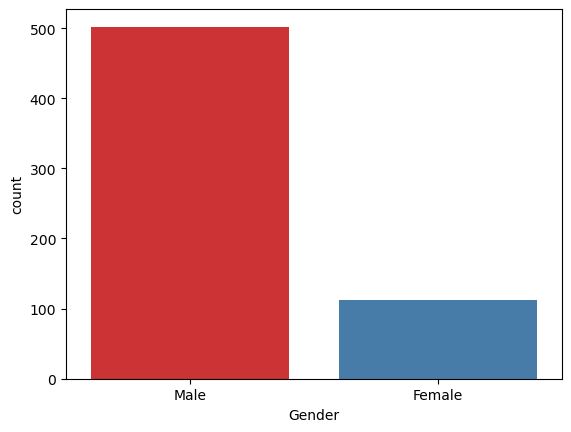

In [94]:
print("num of people who take loan as a group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data = df, palette = 'Set1')

num of people who take loan as a group by married:
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

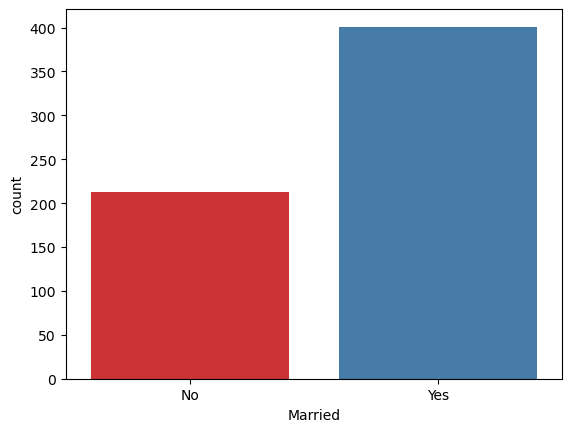

In [95]:
print("num of people who take loan as a group by married:")
print(df['Married'].value_counts())
sns.countplot(x='Married', data = df, palette = 'Set1')

num of people who take loan as a group by Dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

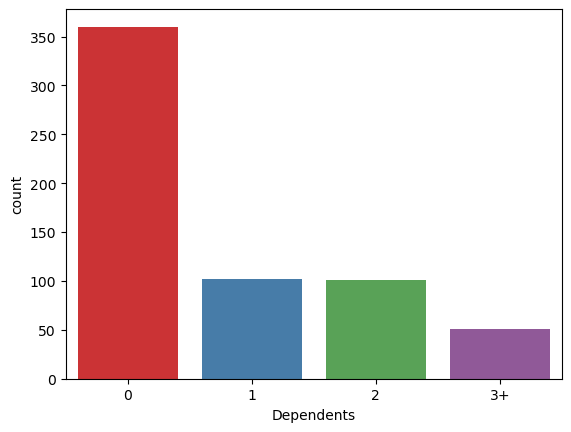

In [96]:
print("num of people who take loan as a group by Dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data = df, palette = 'Set1')

num of people who take loan as a group by Self_Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

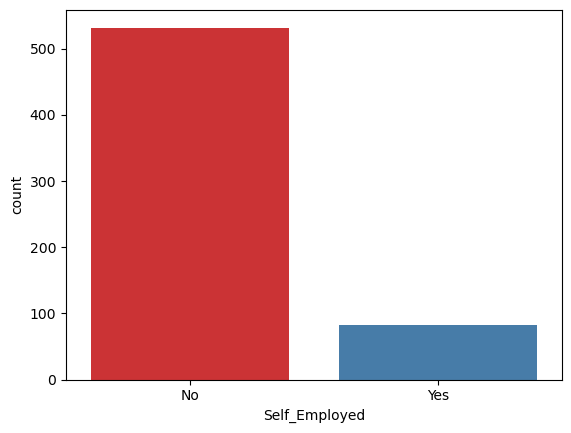

In [97]:
print("num of people who take loan as a group by Self_Employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data = df, palette = 'Set1')

num of people who take loan as a group by LoanAmount:
LoanAmount
120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

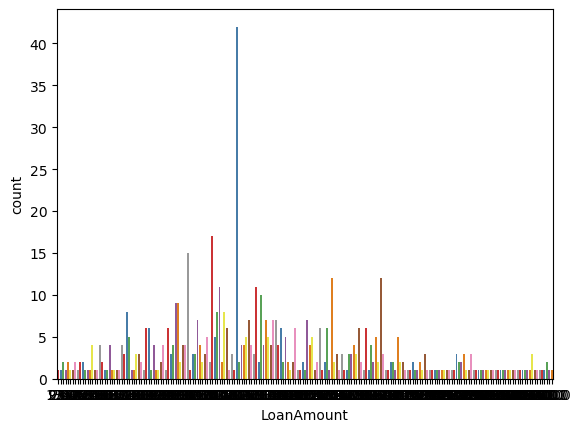

In [98]:
print("num of people who take loan as a group by LoanAmount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data = df, palette = 'Set1')

num of people who take loan as a group by Credit History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

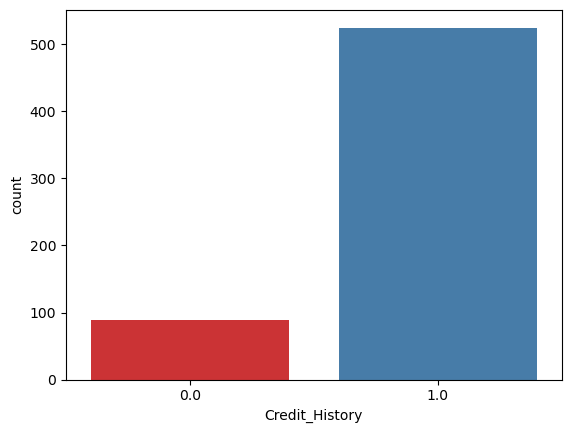

In [99]:
print("num of people who take loan as a group by Credit History:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data = df, palette = 'Set1')

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import LabelEncoder
LabelEncoder_X=LabelEncoder()

In [101]:
for i in range(0,5):
    X_train[:,i]=LabelEncoder_X.fit_transform(X_train[:,i])
    
X_train    

array([[1, 1, 0, ..., 7, 1.0, 4.875197323201151],
       [1, 0, 1, ..., 7, 1.0, 5.278114659230517],
       [1, 1, 0, ..., 7, 0.0, 5.003946305945459],
       ...,
       [1, 1, 3, ..., 7, 1.0, 5.298317366548036],
       [1, 1, 0, ..., 7, 1.0, 5.075173815233827],
       [0, 1, 0, ..., 7, 1.0, 5.204006687076795]], dtype=object)

In [102]:
LabelEncoder_Y=LabelEncoder()
Y_train=LabelEncoder_Y.fit_transform(Y_train)
Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [103]:
for i in range(0,5):
    X_test[:,i]=LabelEncoder_X.fit_transform(X_test[:,i])
    
X_test    

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256],
       [1, 1, 0, 1, 5, 0.0, 5.198497031265826],
       [0, 1, 0, 0, 5, 0.0, 4.7874917427

In [104]:
Y_test=LabelEncoder_Y.fit_transform(Y_test)
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [105]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train , Y_train)

RandomForestClassifier()

In [107]:
from sklearn import metrics
y_predict = rf.predict(X_test)
print("acc of random forest clf is" , metrics.accuracy_score(y_predict , Y_test))
y_predict

acc of random forest clf is 0.7642276422764228


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train , Y_train)

DecisionTreeClassifier()

In [109]:
y_predict = dt_clf.predict(X_test)
print("acc of decesion tree clf is" , metrics.accuracy_score(y_predict , Y_test))
y_predict

acc of decesion tree clf is 0.6910569105691057


array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])